## DAT_12_SF Midterm - submission by cheong-tseng eng
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, datasets, feature_selection
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

%matplotlib inline

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)


####References used in project
http://nbviewer.ipython.org/github/justmarkham/gadsdc1/blob/master/logistic_assignment/kevin_logistic_sklearn.ipynb
Exercise 06 - Neighbors Lab
http://nbviewer.ipython.org/github/jming/cs109/blob/master/lec_10_cross_val.ipynb


In [20]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("C:\Development\DAT_SF_12\DAT_SF_12\Homework\spambase.csv")
allcols = spam_data.columns[:57].values

In [3]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [67]:
spam_data_scaled = pd.DataFrame(preprocessing.scale(spam_data.iloc[:,:57]), index = spam_data.iloc[:,:57].index, columns = spam_data.iloc[:,:57].columns)
spam_data_scaled['is_spam'] = spam_data['is_spam']

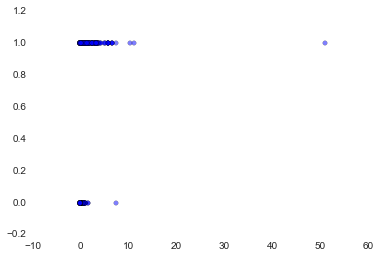

In [71]:
#your code here.
plt.scatter(spam_data_scaled.capital_run_length_longest, spam_data_scaled.is_spam, alpha=0.5)

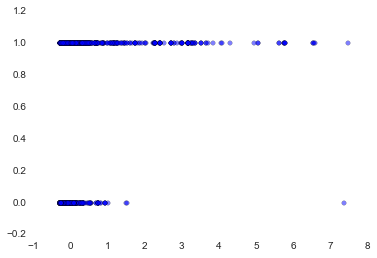

In [72]:
spam_data_reduced = spam_data_scaled[spam_data_scaled.capital_run_length_longest < 10]
plt.scatter(spam_data_reduced.capital_run_length_longest, spam_data_reduced.is_spam, alpha=0.5)

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

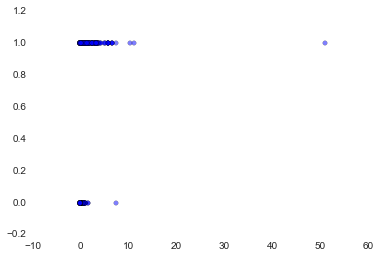

In [202]:
plt.scatter(spam_data_scaled.capital_run_length_longest, spam_data_scaled.is_spam, alpha=0.5)

In [204]:
#your code here
y, X = dmatrices('is_spam ~ capital_run_length_longest', spam_data_scaled, return_type="dataframe")
y = np.ravel(y)

#values with the 'outlier' removed
y_red, X_red = dmatrices('is_spam ~ capital_run_length_longest', spam_data_reduced, return_type="dataframe")
y_red = np.ravel(y_red)

In [205]:
model = LogisticRegression()
model = model.fit(X, y)

model_red = LogisticRegression()
model_red = model.fit(X_red, y_red)

In [206]:
print 'unaltered model: |' + str(model.score(X, y)) + '|'
print 'reduced model: |' + str(model.score(X_red, y_red)) + '|'

unaltered model: |0.725494457727|
reduced model: |0.725315354502|


In [207]:
print 'count of spam messages: |' + str(len(spam_data_scaled[spam_data_scaled.is_spam == 1])) + '|'
print 'count of non-spam messages: |' + str(len(spam_data_scaled[spam_data_scaled.is_spam == 0])) + '|'
print 'count of spam messages: |' + str(len(spam_data_scaled)) + '|'
print 'percent spam is: |' + str( len(spam_data_scaled[spam_data_scaled.is_spam == 1])/len(spam_data_scaled) ) + '|'
print 'percent not spam is: |' + str( len(spam_data_scaled[spam_data_scaled.is_spam == 0])/len(spam_data_scaled) ) + '|'

count of spam messages: |1813|
count of non-spam messages: |2788|
count of spam messages: |4601|
percent spam is: |0.394044772875|
percent not spam is: |0.605955227125|


#####so we're ~12% better off than if we alwasy claimed email was not spam

In [208]:
preds = model.predict(X)

In [209]:
df_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y,preds), columns=[['PRED-0','PRED-1']], index =['ACTL-0','ACTL-1'])
df_confusion_matrix

,PRED-0,PRED-1
ACTL-0,2570,218
ACTL-1,1045,768


### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [210]:
#your code here
from sklearn.cross_validation import train_test_split, cross_val_score

In [211]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(spam_data[allcols].values, y, test_size=0.3, random_state=12)
model_split_by30 = LogisticRegression()
model_split_by30.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [212]:
#get predicitons
predicted = model_split_by30.predict(X_test)

In [213]:
#probability
probs = model_split_by30.predict_proba(X_test)

In [214]:
model_split_by30.predict?

In [215]:
# generate evaluation metrics
print  metrics.accuracy_score(y_test, predicted)
print  metrics.roc_auc_score(y_test, probs[:, 1])

0.932657494569
0.968485535766


In [216]:
df_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,predicted), columns=[['PRED-0','PRED-1']], index =['ACTL-0','ACTL-1'])
df_confusion_matrix

,PRED-0,PRED-1
ACTL-0,813,42
ACTL-1,51,475


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

fold-value is |2| and mean score is: 0.906976361884
fold-value is |3| and mean score is: 0.901972033291
fold-value is |4| and mean score is: 0.897844596381
fold-value is |5| and mean score is: 0.911088032949
fold-value is |6| and mean score is: 0.907831779568
fold-value is |7| and mean score is: 0.915668531087
fold-value is |8| and mean score is: 0.916955539407
fold-value is |9| and mean score is: 0.921519344039
fold-value is |10| and mean score is: 0.916946359983
fold-value is |11| and mean score is: 0.918240578438
fold-value is |12| and mean score is: 0.917617935286
fold-value is |13| and mean score is: 0.916942842498
fold-value is |14| and mean score is: 0.91587105286
fold-value is |15| and mean score is: 0.916695680034
fold-value is |16| and mean score is: 0.917398911606
fold-value is |17| and mean score is: 0.921083857897
fold-value is |18| and mean score is: 0.921049884849
fold-value is |19| and mean score is: 0.922373645682


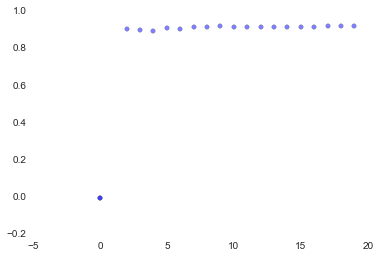

In [217]:
#your code here
lb = 2
ub = 20
scores = np.zeros(ub, dtype=float)
folds = np.empty(ub, dtype=int)

for cnt in range(lb, ub):
    scores[cnt] = cross_val_score(LogisticRegression(), spam_data_scaled[allcols].values, y, scoring='accuracy', cv=cnt).mean()
    folds[cnt] = cnt
    print 'fold-value is |' + str(cnt) + '| and mean score is: ' + str(cross_val_score(LogisticRegression(), spam_data_scaled[allcols].values, y, scoring='accuracy', cv=cnt).mean())

plt.scatter(folds , scores, alpha=0.5)
plt.show()

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [218]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')

fold-value is |2| and mean score is: 0.866114543771
fold-value is |3| and mean score is: 0.872853396114
fold-value is |4| and mean score is: 0.875896762739
fold-value is |5| and mean score is: 0.880648961069
fold-value is |6| and mean score is: 0.882830990738
fold-value is |7| and mean score is: 0.887416717391
fold-value is |8| and mean score is: 0.890657165791
fold-value is |9| and mean score is: 0.891521239632
fold-value is |10| and mean score is: 0.89152094908
fold-value is |11| and mean score is: 0.889984470467
fold-value is |12| and mean score is: 0.893074327467
fold-value is |13| and mean score is: 0.893271417566
fold-value is |14| and mean score is: 0.893055428521
fold-value is |15| and mean score is: 0.895391680461
fold-value is |16| and mean score is: 0.896107196839
fold-value is |17| and mean score is: 0.896954714645
fold-value is |18| and mean score is: 0.896482974478
fold-value is |19| and mean score is: 0.896937310468


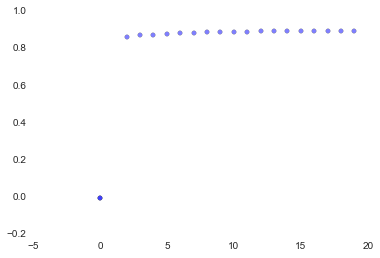

In [219]:
#your code here
lb = 2
ub = 20
scores = np.zeros(ub, dtype=float)
folds = np.empty(ub, dtype=int)

for cnt in range(lb, ub):
    scores[cnt] = cross_val_score(knn_clf, spam_data_scaled[allcols].values, y, scoring='accuracy', cv=cnt).mean()
    folds[cnt] = cnt
    print 'fold-value is |' + str(cnt) + '| and mean score is: ' + str( cross_val_score(knn_clf, spam_data_scaled[allcols].values, y, scoring='accuracy', cv=cnt).mean()  )

plt.scatter(folds , scores, alpha=0.5)
plt.show()

In [220]:
cross_val_score(knn_clf, spam_data_scaled[allcols].values, y, scoring='accuracy', cv=13).mean()

0.89327141756619477

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

######used http://nbviewer.ipython.org/github/dboyliao/cookbook-code/blob/master/notebooks/chapter08_ml/06_random_forest.ipynb
http://scikit-learn.org/0.12/auto_examples/ensemble/plot_forest_importances.html#example-ensemble-plot-forest-importances-py
https://www.kaggle.com/c/titanic-gettingStarted/details/getting-started-with-random-forests

In [221]:
#your code here
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
clf_rforest = RandomForestClassifier(n_estimators = len(spam_data_scaled[allcols]))
clf_rforest = clf_rforest.fit(X_train,y_train)

In [222]:
#print out Feature Importance values as a data frame 
df_feature_importance = pd.DataFrame(clf_rforest.feature_importances_, index=allcols)
df_feature_importance.sort_index(ascending=False).head(10)

,0
word_freq_your,0.060389
word_freq_you,0.031127
word_freq_will,0.011221
word_freq_telnet,0.002022
word_freq_technology,0.003627
word_freq_table,0.000186
word_freq_report,0.001763
word_freq_remove,0.071928
word_freq_receive,0.009562
word_freq_re,0.009931


####Second Try

In [223]:
clf_tree_cls = ExtraTreesClassifier()
X_new = clf_tree_cls.fit(spam_data_scaled[allcols].values, y).transform(spam_data_scaled[allcols].values)

In [224]:
print 'Original dimensions of feature space |' + str(np.shape(spam_data_scaled[allcols])) + '|'
print 'Original dimensions of feature space |' + str(np.shape(X_new)) + '|'

Original dimensions of feature space |(4601, 57)|
Original dimensions of feature space |(4601L, 21L)|


####Only 19 features are recognized by algorithm as necessary

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

####used example from http://scikit-learn.org/0.11/auto_examples/plot_roc.html

In [225]:
#your code here
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print 'Area under the ROC curve : %f' % roc_auc

Area under the ROC curve : 0.968486


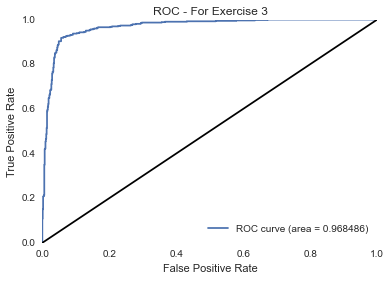

In [97]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - For Exercise 3')
plt.legend(loc="lower right")
plt.show()

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

####using example from http://scikit-learn.org/stable/modules/feature_selection.html

In [123]:
#Your code here
print model_split_by30.predict_proba(X_test)
print model_split_by30.predict(X_test)

[[  2.03766547e-05   9.99979623e-01]
 [  9.98246713e-01   1.75328735e-03]
 [  1.00000000e+00   1.19539071e-23]
 ..., 
 [  3.83036350e-03   9.96169637e-01]
 [  4.82940732e-03   9.95170593e-01]
 [  9.99958397e-01   4.16030694e-05]]
[ 1.  0.  0. ...,  1.  1.  0.]


In [120]:
df_guaging_accuracy = pd.DataFrame( model_split_by30.predict_proba(X_test)) 
df_guaging_accuracy['predicted_value'] = model_split_by30.predict(X_test)
df_guaging_accuracy.head(5)

,0,1,predicted_value
0,0.000020,9.999796e-01,1
1,0.998247,1.753287e-03,0
2,1.000000,1.195391e-23,0
3,1.000000,1.224453e-10,0
4,0.671227,3.287729e-01,0


In [137]:
def new_prob(df):
    df.cut_off_sixty = 7

In [147]:
df_guaging_accuracy['cut_off_sixty'] = df_guaging_accuracy.loc[:,1].map(lambda prob: prob > .6)
df_guaging_accuracy
y_pred_sixty = df_guaging_accuracy['cut_off_sixty'].values.astype(int)
y_pred_orig = df_guaging_accuracy['predicted_value'].values.astype(int)

In [199]:
df_conmatrix_sixty = pd.DataFrame(confusion_matrix(y_test,y_pred_sixty),columns=['pred-0','pred-1'],index=['act-0','act-1'])
df_conmatrix_orig = pd.DataFrame(confusion_matrix(y_test,y_pred_orig),columns=['pred-0','pred-1'],index=['act-0','act-1'])
print '-----------------------'
print '-adjusted to .6--------'
print df_conmatrix_sixty
print '-----------------------'
print '-original matrix-------'
print df_conmatrix_orig

-----------------------
-adjusted to .6--------
       pred-0  pred-1
act-0     821      34
act-1      78     448
-----------------------
-original matrix-------
       pred-0  pred-1
act-0     813      42
act-1      51     475


In [182]:
print len(y_pred_sixty[y_pred_sixty==1])
print (y_pred_orig)
print (y_test)

482
[1 0 0 ..., 1 1 0]
[ 1.  0.  0. ...,  1.  1.  0.]


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [99]:
#your code here
pca = PCA(n_components=2, whiten=True)
pca = pca.fit(spam_data_scaled[allcols].values)
X_pca = pca.transform(spam_data_scaled[allcols].values)

In [100]:
def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],c=c, label=label)

In [101]:
print len(X_pca)
print len( spam_data_scaled.is_spam.values)

4601
4601


reduced shape/dimension is (4601L, 2L)


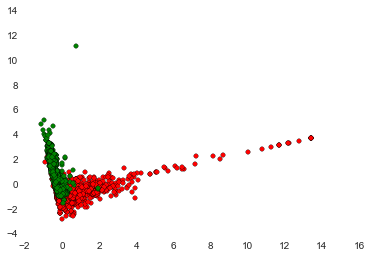

In [102]:
#your visualization here
plot_PCA_2D(X_pca, spam_data_scaled.is_spam.values ,spam_data_scaled.is_spam.values )
print 'reduced shape/dimension is ' + str(X_pca.shape)